Исследование длины и ширины 139 черепов, найденных в Верхнем Египте и относимых к расе, жившей за 8000 лет до нашей эры, показало, что стандартное отклонение длины и ширины черепа 5,722 и 4,612 мм соответственно. Те же величины, выведенные на основании обследования 1000 европейцев, оказались равными 6,161 и 5,055 мм. Предполагая, что законы распределения длины и ширины черепа нормальные, выяснить, можно ли считать расхождение стандартов случайным. Построить график мощности критерия.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

In [12]:
group1_length_std = 5.722
group2_length_std = 6.161
group1_width_std = 4.612
group2_width_std = 5.055
group1_size = 139
group2_size = 1000

In [13]:
std_ancient_length = 5.722
std_modern_length = 6.161
std_ancient_width = 4.612
std_modern_width = 5.055

n_ancient = 139
n_modern = 1000

In [14]:
# Расчёт F-статистик
f_len = (std_ancient_length ** 2) / (std_modern_length ** 2)
f_wid = (std_ancient_width ** 2) / (std_modern_width ** 2)

# Уровень значимости и степени свободы
alpha = 0.05
df1 = n_ancient - 1
df2 = n_modern - 1

# Критические значения F-распределения
f_lower = f.ppf(alpha / 2, df1, df2)
f_upper = f.ppf(1 - alpha / 2, df1, df2)

# p-value для двустороннего теста
p_len = 2 * min(f.cdf(f_len, df1, df2), f.sf(f_len, df1, df2))
p_wid = 2 * min(f.cdf(f_wid, df1, df2), f.sf(f_wid, df1, df2))

In [15]:
print("Проверка различий дисперсий между древними и современными черепами\n")
print(f"F-статистика (длина): {f_len:.4f}")
print(f"F-статистика (ширина): {f_wid:.4f}")
print(f"Критическая область: F < {f_lower:.4f} или F > {f_upper:.4f}")
print(f"P-value (длина): {p_len:.4f}")
print(f"P-value (ширина): {p_wid:.4f}")

Проверка различий дисперсий между древними и современными черепами

F-статистика (длина): 0.8626
F-статистика (ширина): 0.8324
Критическая область: F < 0.7674 или F > 1.2717
P-value (длина): 0.2728
P-value (ширина): 0.1732


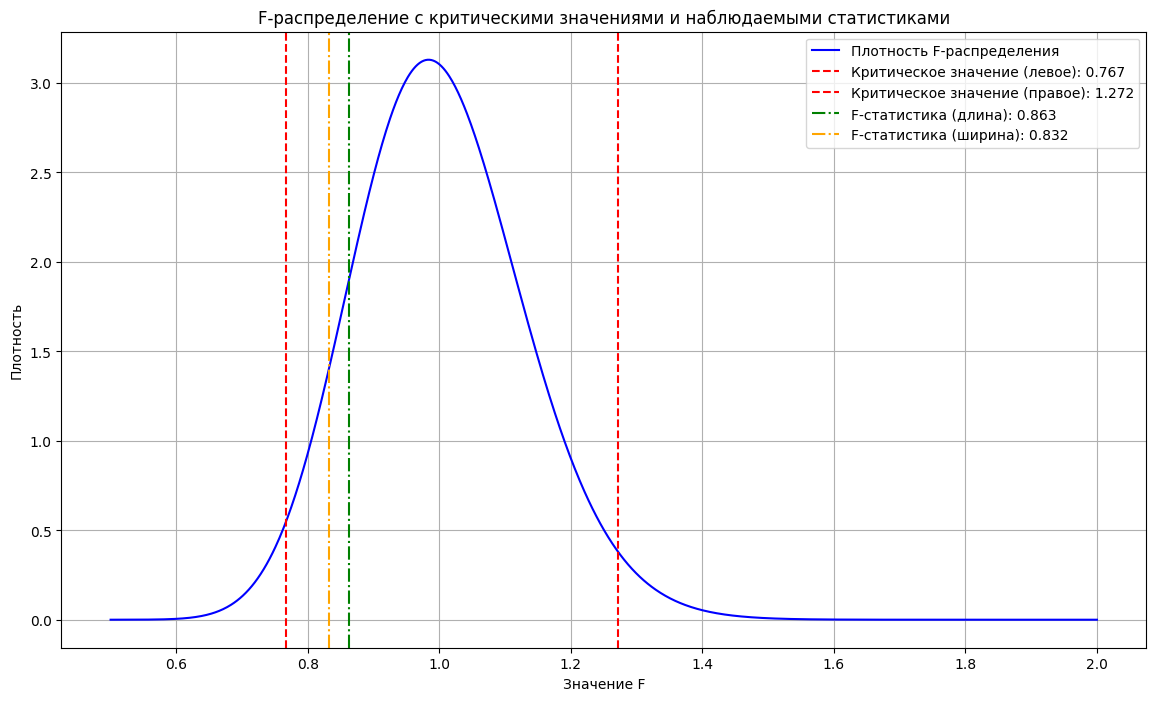

In [16]:
# Визуализация распределения и F-статистик
x = np.linspace(0.5, 2.0, 1000)
pdf_values = f.pdf(x, df1, df2)


plt.figure(figsize=(14, 8))
plt.plot(x, pdf_values, label='Плотность F-распределения', color='blue')
plt.axvline(f_lower, color='red', linestyle='--', label=f'Критическое значение (левое): {f_lower:.3f}')
plt.axvline(f_upper, color='red', linestyle='--', label=f'Критическое значение (правое): {f_upper:.3f}')
plt.axvline(f_len, color='green', linestyle='-.', label=f'F-статистика (длина): {f_len:.3f}')
plt.axvline(f_wid, color='orange', linestyle='-.', label=f'F-статистика (ширина): {f_wid:.3f}')
plt.title("F-распределение с критическими значениями и наблюдаемыми статистиками")
plt.xlabel("Значение F")
plt.ylabel("Плотность")
plt.legend()
plt.grid(True)
plt.show()


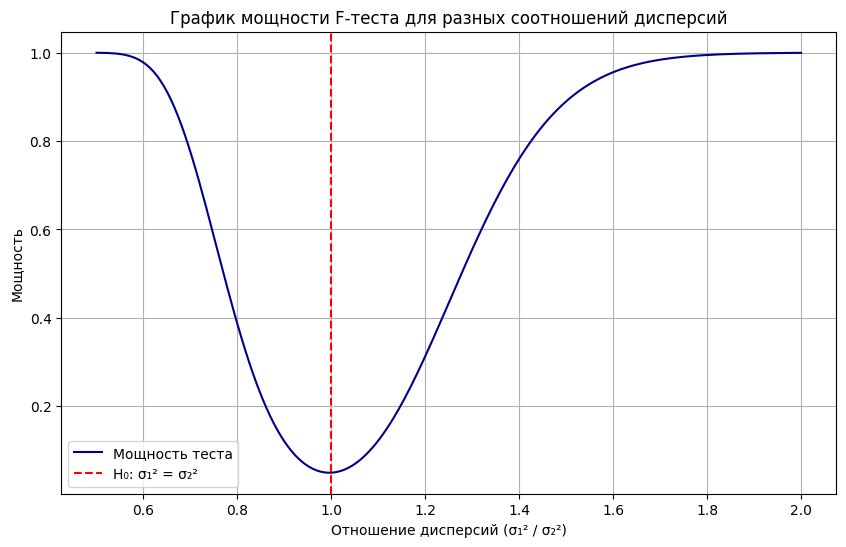

In [17]:
# Построение графика мощности критерия
ratios = np.linspace(0.5, 2.0, 200)
power_values = 1 - f.cdf(f_upper, df1, df2, scale=ratios) + f.cdf(f_lower, df1, df2, scale=ratios)

plt.figure(figsize=(10, 6))
plt.plot(ratios, power_values, label="Мощность теста", color="darkblue")
plt.axvline(1.0, color="red", linestyle="--", label="H₀: σ₁² = σ₂²")
plt.title("График мощности F-теста для разных соотношений дисперсий")
plt.xlabel("Отношение дисперсий (σ₁² / σ₂²)")
plt.ylabel("Мощность")
plt.legend()
plt.grid(True)
plt.show()